#DATA GUARDIANS

Integrantes:



*   Angel Povis
*   Richard Durán
*   Dominick Alvarez


#INSTRUCCIONES

1. Cargar los archivos en la ruta de Colab (en la misma ubicación que '*sample_data*')

TRAIN -> /content/train.csv | TEST -> /content/test.csv

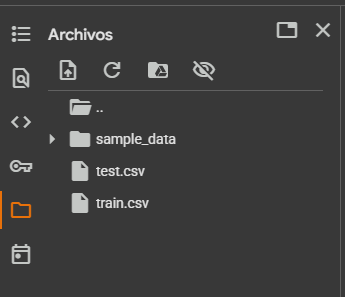

2. Ejecutar los instaladores necesarios de acuerdo a su computador en la siguiente celda.

In [ ]:
pip install tensorflow xgboost

In [ ]:
import pandas as pd # type: ignore

# Read the CSV file
data = pd.read_csv('/content/train.csv')

# Display the first few rows of the data
data.head()
data.columns = data.columns.str.replace("'", "", regex=False)

In [ ]:
def extract_Location(data_set: pd.DataFrame) -> pd.DataFrame:
    data_set['Location'] = data_set['Location'].str.extract(r'([^-\s]+)')
    data_set['Location'].fillna('NA', inplace=True)
    return data_set
data= extract_Location(data)

/tmp/ipython-input-3-2643891686.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_set['Location'].fillna('NA', inplace=True)


In [ ]:
def clean_beach_resort(dataset):
    allowed_values = [ 'Nulo' ,'Not specified', '0' , '1']
    dataset['Beach_Resort'] = dataset['Beach_Resort'].apply(lambda x: 'NA' if pd.isna(x) or x in allowed_values else x)
    return dataset

In [ ]:
data = clean_beach_resort(data)

In [ ]:
def extract_date(data_set: pd.DataFrame) -> pd.DataFrame:
    #data_set['Publication_Date'] = data_set['Publication_Date'].str.extract(r'Publicado el (.+)')
    #data_set['Publication_Date'] = pd.to_datetime(data_set['Publication_Date'], errors='coerce')
    #data_set['Publication_Date'] = data_set['Publication_Date'].fillna(data_set['Publication_Date'].mode()[0])
    #data_set['Publication_Year'] = data_set['Publication_Date'].dt.year
    #data_set['Publication_Month'] = data_set['Publication_Date'].dt.month
    #data_set['Publication_Day'] = data_set['Publication_Date'].dt.day
    data_set.drop(columns='Publication_Date', inplace=True)
    return data_set

In [ ]:
data = extract_date(data)

In [ ]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

In [ ]:
data.groupby('Total_Area_m2').size()

,0
Total_Area_m2,
0,43
1,2
100,31
1000,143
1002,5
...,...
99,3
990,4
997,1


In [ ]:
for column in data.columns:
    print('--------------------------------')
    print(data.groupby(column).size())

--------------------------------
Id
0       1
1       1
2       1
3       1
4       1
       ..
6995    1
6996    1
6997    1
6998    1
6999    1
Length: 7000, dtype: int64
--------------------------------
Gas_Connection
0                3175
1                 484
Not specified    3341
dtype: int64
--------------------------------
Fireplace
0                3270
1                1319
Not specified    2411
dtype: int64
--------------------------------
Entrance_Hall
0                1864
1                2695
Not specified    2441
dtype: int64
--------------------------------
Kitchenette
0                6791
Not specified     209
dtype: int64
--------------------------------
Equipped
0                4161
1                 428
Not specified    2411
dtype: int64
--------------------------------
Garage_Type
Lineales          604
NoTiene           835
Not specified    2892
Paralelas        2505
Separadas         164
dtype: int64
--------------------------------
Furnished
0                3

In [ ]:
# Remove Construction_Area column, its redundant with construction area
data.drop(columns=['Construction_Area'], inplace=True)


In [ ]:
data['Total_Area_m2'] = pd.to_numeric(data['Total_Area_m2'], errors='coerce')

In [ ]:
dict_bedrooms = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5+': 5
}
def preprocess_data(data_set):
    data_set['Bedrooms'] = data_set['Bedrooms'].apply(lambda x: dict_bedrooms.get(x, x))
    data_set['Bedrooms'].fillna(data_set['Bedrooms'].mode()[0], inplace=True)
    return data_set

In [ ]:
data = preprocess_data(data)

/tmp/ipython-input-13-1895079081.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_set['Bedrooms'].fillna(data_set['Bedrooms'].mode()[0], inplace=True)


In [ ]:
numeric_columns = ['Number_Floors', 'Age']
def fill_numeric_column(column_name, dataset):
    dataset[column_name] = pd.to_numeric(dataset[column_name], errors='coerce')
    dataset[column_name].fillna(dataset[column_name].mode()[0], inplace=True)
    return dataset

In [ ]:

for column in numeric_columns:
    data = fill_numeric_column(column, data)

/tmp/ipython-input-15-1612466116.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column_name].fillna(dataset[column_name].mode()[0], inplace=True)


In [ ]:
allowed_values = ['0', '1', 'Nulo', 'Not specified', 'Si', 'No']
def remove_trash_data(column,dataset):
    print('--------------------------------')
    print('Removing trash data from column:', column)
    print(dataset.groupby(column).size())
    dataset = dataset[(dataset[column].isin(allowed_values)) | (dataset[column].isnull())]
    print(dataset.groupby(column).size())
    return dataset

In [ ]:
trash_columns = ['Internet', 'Sauna_Area', 'Air_Conditioning', 'Independent_Entrance', 'Jacuzzi', 'Service_Bathroom'
                 ,'Cable', 'Service_Room', 'Internet_Room', 'Daycare', 'Daily_Dining_Room', 'Heating', 'Pets']
for column in trash_columns:
    data = remove_trash_data(column, data)

--------------------------------
Removing trash data from column: Internet
Internet
0                                                                2105
1                                                                1194
Not specified                                                    3160
Panamericana Sur Km 94.5 Asia                                       1
Panamericana Sur Km 94.5 Club Playa Las Arenas Asia                 1
Panamericana Sur Km 94.5 Club Playa Las Arenas Casa B_22 Asia       1
Publicado el 05.09.19                                               1
Publicado el 10.09.19                                               1
Publicado el 12.08.19                                               2
Publicado el 13.04.19                                               5
Publicado el 13.09.19                                               1
Publicado el 14.09.19                                               1
Publicado el 17.09.19                                               6
Public

In [ ]:
data = data[data['Age']!= 'Not specified']
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

In [ ]:
import numpy as np
def replace_not_specified_with_mode(column, dataset):
    dataset[column] = dataset[column].apply(lambda x: np.nan if (x == 'Not specified' or x == 'Nulo') else
                                      '1' if (x == '1' or x == 'Si')
                                      else '0' if (x == '0' or x == 'No') else x)
    #dataset[column+'_missing'] = dataset[column].isna().astype(int)
    #dataset[column].fillna(None, inplace=True)
    dataset[column].fillna('NA', inplace=True)
    dataset[column].replace('NA', None, inplace=True)
    dataset[column] = dataset[column].astype('category')
    print(dataset.groupby(column).size())
    return dataset

In [ ]:
# Posibles columnas repetidas en el dataset
# Sauna, Sauna_area,
# Oceanfront, Near_Sea
# Kitchenette, Kitchen_with_Cabinets


columns_replace_with_mode = ['Gas_Connection', 'Fireplace', 'Entrance_Hall', 'Kitchenette',
           'Equipped', 'Furnished', 'Drainage', 'Telephone', 'Guest_Bathroom', 'BBQ_Area',
           'Living_Room', 'Nearby_Parks', 'Solarium', 'Commercial_Use', 'Internal_Garden',
           'Electricity', 'Patio', 'Children_Playground', 'Green_Areas', 'Electric_Doorman',
           'Intercom', 'Near_Sea', 'Sauna', 'Cinema_Room', 'Cleaning_Service', 'Terrace',
           'Sports_Area', 'Security_System', 'Water_Heater', 'Professional_Use', 'Club_House',
           'Internal_Park', 'Laundry_Room', 'Nearby_Schools', 'Balcony', 'Attic', 'Oceanfront', 'Security_Guard',
           'Swimming_Pool', 'Electric_Fence', 'Air_Conditioning', 'Hall', 'Nearby_Shopping_Centers', 'Kitchen',
           'Water', 'Basement', 'Independent_Bathroom', 'Walk_in_Closet', 'Grill', 'Closet',
           'Internet', 'Sauna_Area', 'Kitchen_with_Cabinets', 'Gym', 'Handicap_Access', 'Dining_Room',
           'Office', 'Service_Bathroom', 'Storage_Room', 'Cable', 'Jacuzzi', 'Independent_Entrance', 'Service_Room',
           'Internet_Room', 'Daycare', 'Daily_Dining_Room', 'Heating', 'Match', 'Pets', 'Garden']
for column in columns_replace_with_mode:
    print(f'Processing column: {column}')
    data = replace_not_specified_with_mode(column, data)

/tmp/ipython-input-20-4101652784.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna('NA', inplace=True)
/tmp/ipython-input-20-4101652784.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(dataset.groupby(column).size())
/tmp/ipython-input-20-4101652784.py:8: FutureWarning: A value is trying to be set on a c

Processing column: Gas_Connection
Gas_Connection
0    3139
1     477
dtype: int64
Processing column: Fireplace
Fireplace
0    3240
1    1311
dtype: int64
Processing column: Entrance_Hall
Entrance_Hall
0    1856
1    2690
dtype: int64
Processing column: Kitchenette
Kitchenette
0    6748
dtype: int64
Processing column: Equipped
Equipped
0    4134
1     417
dtype: int64
Processing column: Furnished
Furnished
0    3738
1     813
dtype: int64
Processing column: Drainage
Drainage
0    3277
1    1274
dtype: int64
Processing column: Telephone
Telephone
0    2352
1    1264
dtype: int64
Processing column: Guest_Bathroom
Guest_Bathroom
0    3167
1    3581
dtype: int64
Processing column: BBQ_Area
BBQ_Area
0    3745
1     801
dtype: int64
Processing column: Living_Room
Living_Room
0    3834
1    2914
dtype: int64
Processing column: Nearby_Parks
Nearby_Parks
0     672
1    2184
dtype: int64
Processing column: Solarium
Solarium
0    4538
1       8
dtype: int64
Processing column: Commercial_Use
Commer

/tmp/ipython-input-20-4101652784.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(dataset.groupby(column).size())
/tmp/ipython-input-20-4101652784.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna('NA', inplace=True)
/tmp/ipython-input-20-4101652784.py:11: FutureWarning: The default of observed=False is 

Kitchen
0     364
1    5908
dtype: int64
Processing column: Water
Water
0     748
1    2552
dtype: int64
Processing column: Basement
Basement
0    5962
1     310
dtype: int64
Processing column: Independent_Bathroom
Independent_Bathroom
0    6272
dtype: int64
Processing column: Walk_in_Closet
Walk_in_Closet
0    4746
1    1526
dtype: int64
Processing column: Grill
Grill
0    1987
1    2187
dtype: int64
Processing column: Closet
Closet
0    5946
1     326
dtype: int64
Processing column: Internet
Internet
0    2105
1    1194
dtype: int64
Processing column: Sauna_Area
Sauna_Area
0    4183
1      67
dtype: int64
Processing column: Kitchen_with_Cabinets
Kitchen_with_Cabinets
0    2712
1    1462
dtype: int64
Processing column: Gym
Gym
0    3911
1     339
dtype: int64
Processing column: Handicap_Access
Handicap_Access
0    2187
1     405
dtype: int64
Processing column: Dining_Room
Dining_Room
0     531
1    5739
dtype: int64
Processing column: Office
Office
0    4217
1    2053
dtype: int64
Pro

/tmp/ipython-input-20-4101652784.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(dataset.groupby(column).size())
/tmp/ipython-input-20-4101652784.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna('NA', inplace=True)
/tmp/ipython-input-20-4101652784.py:11: FutureWarning: The default of observed=False is 

In [ ]:
def clean_categorical_columns(dataset):
    categorical_cols = ['Garage_Type', 'Province', 'Type', 'Location', 'Natural_Light', 'Advertiser', 'Bedrooms', 'Pets', 'Garden', 'Beach_Resort', 'District', 'Property_Condition']
    for column in categorical_cols:
        print(f'Processing categorical column: {column}')
        dataset[column] = dataset[column].astype('category')
        #dataset[column].cat.add_categories(None)
        dataset[column] = dataset[column].replace('NA', None)
        dataset[column] = dataset[column].replace('Not specified', None)

        #dataset[column] = dataset[column].fillna(dataset[column].mode()[0])
        #dataset[column] = dataset[column].fillna(None)

    return dataset


In [ ]:
data = clean_categorical_columns(data)

Processing categorical column: Garage_Type
Processing categorical column: Province
Processing categorical column: Type
Processing categorical column: Location
Processing categorical column: Natural_Light
Processing categorical column: Advertiser
Processing categorical column: Bedrooms
Processing categorical column: Pets
Processing categorical column: Garden
Processing categorical column: Beach_Resort
Processing categorical column: District
Processing categorical column: Property_Condition


/tmp/ipython-input-22-2360821928.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  dataset[column] = dataset[column].replace('Not specified', None)
/tmp/ipython-input-22-2360821928.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  dataset[column] = dataset[column].replace('NA', None)
/tmp/ipython-input-22-2360821928.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_cat

In [ ]:
# Drop unique columns
for column in data.columns:
    if len(data[column].unique()) == len(data):
        print(f'Dropping unique column: {column}')
        data.drop(columns=[column], inplace=True)
    elif len(data[column].unique()) == 1:
        print(f'Dropping column with one value: {column}')
        data.drop(columns=[column], inplace=True)

Dropping unique column: Id


In [ ]:
columns_delete = [ 'Advertiser', 'Cleaning_Service', 'Telephone', 'Internet_Room', 'Service_Bathroom', 'Service_Room',
                    'Handicap_Access', 'Office', 'Club_House', 'Kitchen', 'Air_Conditioning', 'Location', 'Match']

In [ ]:
# Identify categorical and numerical columns
columns_object =data.select_dtypes(include=['object']).columns.tolist()
print(columns_object)
data.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()
#data.drop(columns=columns_object, inplace=True)

[]


['Garages',
 'Number_Bathrooms',
 'Construction_Area_m2',
 'Age',
 'Number_Floors',
 'Total_Area_m2',
 'Price']

In [ ]:
data.select_dtypes(include=['int64', 'float64']).columns.tolist()

['Garages',
 'Number_Bathrooms',
 'Construction_Area_m2',
 'Age',
 'Number_Floors',
 'Total_Area_m2',
 'Price']

In [ ]:
import numpy as np
def replace_not_specified_with_mediam(column, dataset):
    dataset[column] = dataset[column].apply(lambda x: np.nan if (x == 'Not specified' or x == 'Nulo') else x)
    dataset[column].fillna(dataset[column].median(), inplace=True)
    return dataset

In [ ]:
data = replace_not_specified_with_mediam('Total_Area_m2', data)
#data.drop(columns='Beach_Resort', inplace=True)
data.drop_duplicates(inplace=True)

/tmp/ipython-input-28-4007228366.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(dataset[column].median(), inplace=True)


In [ ]:
data.drop(columns=columns_delete, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Select features and target
X = data.drop(columns=['Price'])
y = data['Price']
y = np.log(y)  # Log-transform the target variable for better performance

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['category']).columns.tolist()
numerical_cols = ['Garages', 'Number_Bathrooms', 'Age', 'Number_Floors']
log_cols = ['Construction_Area_m2', 'Total_Area_m2']
boolean_cols = X.select_dtypes(include=['bool']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('bool', OneHotEncoder() ,boolean_cols),
        ('num', StandardScaler(), numerical_cols),
        ('log', FunctionTransformer(np.log), log_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit and transform data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Build neural network
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_processed.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


optimizer = Adam(clipvalue=0.001)  # Clip gradients to a value between -1 and 1
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train_processed, y_train, epochs=150, batch_size=64, validation_split=0.1, callbacks=[early_stop], verbose=1)

# Evaluate model
loss, mae = model.evaluate(X_test_processed, y_test, verbose=0)
print(f"Test MAE: {mae:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 53.6479 - mae: 5.6872 - val_loss: 0.4860 - val_mae: 0.5729
Epoch 2/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2882 - mae: 0.4069 - val_loss: 0.1829 - val_mae: 0.3077
Epoch 3/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2065 - mae: 0.3410 - val_loss: 0.2501 - val_mae: 0.3841
Epoch 4/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2559 - mae: 0.3943 - val_loss: 0.1765 - val_mae: 0.3016
Epoch 5/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1922 - mae: 0.3363 - val_loss: 0.1805 - val_mae: 0.3123
Epoch 6/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1831 - mae: 0.3283 - val_loss: 0.1634 - val_mae: 0.2941
Epoch 7/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1684 - mae: 0.3158 - val_loss: 0.1860 - val_mae: 0.3293
Epoch 8/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1589 - mae: 0.3029 - val_loss: 0.1583 - val_mae: 0.2889
Epoch 9/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [ ]:
'''
import tensorflow as tf
from tensorflow.keras import layers, models
from xgboost import XGBRegressor

input_dim = X_train_processed.shape[1]
encoding_dim = 20  # compress to 4 features

# Build autoencoder model
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(8, activation='relu')(input_layer)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)  # bottleneck

decoded = layers.Dense(8, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)

autoencoder = models.Model(inputs=input_layer, outputs=decoded)

# Compile and train
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_processed, X_train_processed, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test_processed, X_test_processed), verbose=0)
'''

"\nimport tensorflow as tf\nfrom tensorflow.keras import layers, models\nfrom xgboost import XGBRegressor\n\ninput_dim = X_train_processed.shape[1]\nencoding_dim = 20  # compress to 4 features\n\n# Build autoencoder model\ninput_layer = layers.Input(shape=(input_dim,))\nencoded = layers.Dense(8, activation='relu')(input_layer)\nencoded = layers.Dense(encoding_dim, activation='relu')(encoded)  # bottleneck\n\ndecoded = layers.Dense(8, activation='relu')(encoded)\ndecoded = layers.Dense(input_dim, activation='linear')(decoded)\n\nautoencoder = models.Model(inputs=input_layer, outputs=decoded)\n\n# Compile and train\nautoencoder.compile(optimizer='adam', loss='mse')\nautoencoder.fit(X_train_processed, X_train_processed, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test_processed, X_test_processed), verbose=0)\n"

In [ ]:
'''
encoder = models.Model(inputs=input_layer, outputs=encoded)

# Encode training and test data
X_train_encoded = encoder.predict(X_train_processed)
X_test_encoded = encoder.predict(X_test_processed)
'''

'\nencoder = models.Model(inputs=input_layer, outputs=encoded)\n\n# Encode training and test data\nX_train_encoded = encoder.predict(X_train_processed)\nX_test_encoded = encoder.predict(X_test_processed)\n'

In [ ]:

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
# Create the model
mlp = MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=10000, random_state=1)

# Train the model
mlp.fit(X_train_processed, y_train)
y_pred = mlp.predict(X_test_processed).flatten()

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
print(f"R2 score on test set: {r2:.4f}")

MAE: 0.3178462638155245
R2 score on test set: 0.7282


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 7. Train Random Forest Regressor
randomForest = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=10,)
randomForest.fit(X_train_processed, y_train)

# 8. Predict and evaluate
y_pred = randomForest.predict(X_test_processed)
# Calculate R2 score
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
print(f"R2 score on test set: {r2:.4f}")

MAE: 0.2881817018281523
R2 score on test set: 0.7893


In [ ]:
import numpy as np
from sklearn.linear_model import Lasso

# Create Lasso model with regularization strength (alpha)
lasso = Lasso(alpha=0.1)

# Fit to training data
lasso.fit(X_train_processed, y_train)

y_pred = lasso.predict(X_test_processed).flatten()

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
print(f"R2 score on test set: {r2:.4f}")

MAE: 0.4154630389227033
R2 score on test set: 0.5901


In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=10,
    random_state=151
)

# Train the model
xgb_model.fit(X_train_processed, y_train)

y_pred = xgb_model.predict(X_test_processed).flatten()

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
print(f"R2 score on test set: {r2:.4f}")

MAE: 0.25557489190396715
R2 score on test set: 0.8265


In [ ]:

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Crear el clasificador XGBoost
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'min_child_weight': [1, 5, 10]
}
# Realizar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1)

# Ajustar el modelo
grid_search.fit(X_train_processed, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")
# Predecir con el mejor modelo
best_model = grid_search.best_estimator_

# Predicciones
y_pred = best_model.predict(X_test_processed)

# Evaluar el rendimiento
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")


Fitting 3 folds for each of 1458 candidates, totalling 4374 fits


In [ ]:
'''
import numpy as np
import pandas as pd
from xgboost import XGBRegressor

xgb_model_best = XGBRegressor(
    colsample_bytree=0.7,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    n_estimators=500,
    subsample=1.0
)

# Train the model
xgb_model_best.fit(X_train_processed, y_train)

y_pred = xgb_model_best.predict(X_test_processed).flatten()

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
print(f"R2 score on test set: {r2:.4f}")
'''

In [ ]:
from sklearn.metrics import r2_score

# Predict on test set
y_pred = model.predict(X_test_processed).flatten()

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
print(f"R2 score on test set: {r2:.4f}")

In [ ]:
test_data = pd.read_csv('/content/test.csv')
test_data.columns = test_data.columns.str.replace("'", "", regex=False)
test_data.head()



In [ ]:
test_data

In [ ]:
# Remove Construction_Area column, its redundant with construction area
#test_data.drop(columns=['Beach:Resort'], inplace=True)
test_data = extract_date(test_data)
test_data= extract_Location(test_data)
test_data = clean_beach_resort(test_data)
test_data.drop(columns=['Construction_Area'], inplace=True)
test_data['Total_Area_m2'] = pd.to_numeric(test_data['Total_Area_m2'], errors='coerce')
test_data = replace_not_specified_with_mediam('Total_Area_m2', test_data)
test_data = preprocess_data(test_data)
for column in numeric_columns:
    test_data = fill_numeric_column(column, test_data)

test_data['Age'] = pd.to_numeric(test_data['Age'], errors='coerce')

for column in trash_columns:
    test_data = remove_trash_data(column, test_data)
for column in columns_replace_with_mode:
    print(f'Processing column: {column}')
    test_data = replace_not_specified_with_mode(column, test_data)

test_data = clean_categorical_columns(test_data)

# Drop unique columns
for column in test_data.columns:
    if len(test_data[column].unique()) == len(test_data):
        print(f'Dropping unique column: {column}')
        test_data.drop(columns=[column], inplace=True)
    elif len(test_data[column].unique()) == 1:
        print(f'Dropping column with one value: {column}')
        test_data.drop(columns=[column], inplace=True)

test_data.drop(columns=columns_object, inplace=True)
test_data.drop(columns=columns_delete, inplace=True)
#test_data.drop(columns='Beach_Resort', inplace=True)
test_data.info()

In [ ]:
test_data

In [ ]:
# Identify categorical and numerical columns
#columns_object =test_data.select_dtypes(include=['object']).columns.tolist()
print(columns_object)
data.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()
#test_data.drop(columns=columns_object, inplace=True)

In [ ]:
data.columns

In [ ]:
test_data

In [ ]:
test_data_processed = preprocessor.transform(test_data)
# Predict prices
predicted_prices = best_model.predict(test_data_processed)
print(predicted_prices)
predicted_prices = np.exp(predicted_prices)  # Inverse log transformation to get actual prices
# Add predictions to test_data
test_data['Predicted_Price'] = predicted_prices.flatten()
test_data[['Predicted_Price']].head()

df = pd.DataFrame(predicted_prices, columns=['Price'])
df.index.name = 'Id'
print(df)
df.to_csv('submission.csv', index=True)